<h1>Final Project</h1>

<strong>Team: J.I.A </strong>

<strong> _Ishaan, James, Ariana_ </strong>

<h2>Introduction</h2>

For our project, we decided on using the metrics of environment and safety to determine the best neighborhood in Pittsburgh. We thought of a few other metrics such as education, traffic/noise, and wealthiest; however, we chose environment/beauty and safety because we believe those metrics will provide the most accurate analysis of what determines a good neighborhood. Those looking to find a home would want the area they are living in to be safe for themselves and anyone else living with them, especially children. Additionally, the cleanliness of a neighborhood is important for health and aesthetic reasons. The other metrics that we decided not to explore were more superficial.

<h2>The Metrics</h2>

We focused on three different datasets for safest, and four for beauty. For safety, we used a dataset about the police incident reportings, arrests, and firearms that citizens owned. This allows us to have a thorough overview of different aspects that would make a city unsafe. The safest neighborhood would have the least amount of incidents, arrests, and firearms For environment, we used data containing the number of Smart Cans in each city, the number of city pools, number of playgrounds, and number of playing-fields. The city with the best environment would have the largest amount of each. By analyzing these datasets, it allows us to see if a neighborhood has a pleasant environment for it's residents to engage with, and if there is a sufficient amount of recreation.

<h2>The Code </h2>

The code below shows our process of analyzing the data sets, and sorting through them. Each neighborhood started with a score of 0, and got one point added for each time the neighborhood was reported in the data sets. Then it was sorted and a graph is shown, highlighting the ten highest scores.

In [11]:
import pandas as pd


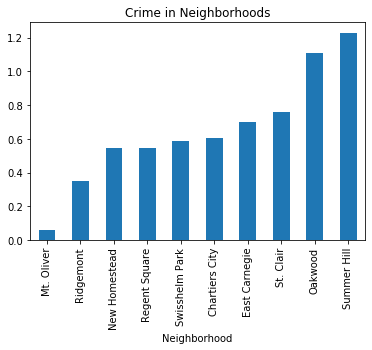

In [42]:
neighborhood = pd.read_csv("Neighborhoods_.csv")
hoodsdict = neighborhood['hood'].value_counts().to_dict()
neighborhood.set_index('hood')

firearms = pd.read_csv("Firearms.csv")
armsdict = firearms['neighborhood'].value_counts().to_dict()

incidents = pd.read_csv("Police_Incident.csv")
incidentdict = incidents['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

arrests = pd.read_csv("Arrest.csv")
arrestsdict = arrests['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()


score = hoodsdict

for key in armsdict:
    if key in score:
        score[key] = score[key] + armsdict[key]
for key in incidentdict:
    if key in score:
        score[key] = score[key] + incidentdict[key]
for key in arrestsdict:
    if key in score:
        score[key] = score[key] + arrestsdict[key]
        
array = list(score.values())
array.sort(reverse = True)
ratio = 50/array[0]
for key in score:
    score[key] = ratio * score[key]
s = pd.Series(score, name="Score")
s.index.name = "Neighborhood"
s.sort_values(ascending=True).iloc[0:10].plot(kind='bar', title="Crime in Neighborhoods")



<h2>More Code</h2>

In this next part of code, we basically did the same thing with the datasets relating to the enivornment factor. Then, again, it was graphed and displayed to show the ten highest scoring neighborhoods for the environmental aspect.

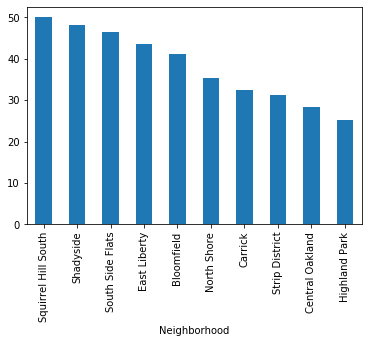

In [46]:
neighborhood = pd.read_csv("Neighborhoods_.csv")
hoodsdict = neighborhood['hood'].value_counts().to_dict()
neighborhood.set_index('hood')

cans = pd.read_csv("Cans.csv")
cansdict = cans['neighborhood'].value_counts().to_dict()

playgrounds = pd.read_csv('https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367')
part1 = playgrounds['neighborhood'].value_counts().to_dict()


courts = pd.read_csv('https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227')
part2 = courts['neighborhood'].value_counts().to_dict()


fields = pd.read_csv('https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23')
part3 = fields['neighborhood'].value_counts().to_dict()


pools = pd.read_csv('https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a')
part4 = pools['neighborhood'].value_counts().to_dict()


scoresEnv = hoodsdict

for key in cansdict:
    if key in scoresEnv:
        scoresEnv[key] = scoresEnv[key] + cansdict[key]
for key in part1:
    if key in scoresEnv:
        scoresEnv[key] = part1[key] + scoresEnv[key]
for key in part2:
    if key in scoresEnv:
        scoresEnv[key] = part2[key] + scoresEnv[key]
for key in part3:
    if key in scoresEnv:
        scoresEnv[key] = part3[key] + scoresEnv[key]
for key in part4:
    if key in scoresEnv:
        scoresEnv[key] = part4[key] + scoresEnv[key]

array = list(scoresEnv.values())
array.sort(reverse=True)
ratio = 50/array[0]

for key in scoresEnv:
    scoresEnv[key] = ratio * scoresEnv[key]
s = pd.Series(scoresEnv, name="Score")
s.index.name = "Neighborhood"
s.sort_values(ascending=False).iloc[0:10].plot(kind='bar')

<h2> Last Bit Of Code </h2>

In this final part, we make the scores 50 as a base line, then add the values from the array storing the environmental score , and subtracted their score from the safety incidents. In the end, we displayed it using a final bar graph that highlights the actual best scores.

Neighborhood
Squirrel Hill South      88.958252
Shadyside                85.340249
Bloomfield               77.969292
North Shore              75.227789
Strip District           74.621652
Central Oakland          71.036699
Lower Lawrenceville      70.215969
East Liberty             69.748686
Highland Park            67.763880
Central Lawrenceville    63.464690


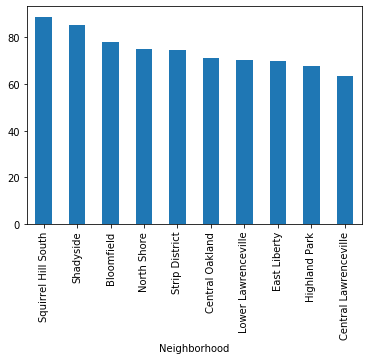

In [10]:
totalScores = score
for key in score:
    totalScores[key] = 50 + scoresEnv[key] - score[key]
s = pd.Series(totalScores, name="Score")
s.index.name = "Neighborhood"
isSorted = s.sort_values(ascending = False)
isSorted.iloc[0:10].plot(kind='bar')
print(s.sort_values(ascending = False).head(10).to_string())

<h2> The Best Neighborhood </h2>

According to our data, the best neighborhood is Squirrel Hill South with a total of 88.96 points.

<img src="SquirrelHill.jpg"
     alt="Squirrel Hill"
     style="float: left; margin-right: 5px;" />

And the runner-up is Shadyside with a total 85.34 points. 

<img src="Shadyside.jpg"
     alt="Shadyside"
     style="float: left; margin-right: 5px;" />

<h2>Conclusion</h2>

Based on the results of the graphs, I have concluded that Squirrel Hill South is the best neighborhood for the most amount of Outdoor Recreation. Out of all the neighborhoods, it has the greatest number of playgrounds and number of courts/rinks. It also has lots of playing fields, and a pool too. Another good options include Highland Park, Southside Slopes, Hazelwood, and Beechview if you are looking for a nice variety of all activities. Brighton Heights is a good option if you are only interested in playing fields. Brookline is a good option if you don't care about playgrounds and want to stick to courts/rinks and playing fields.
